In [2]:
import requests

In [3]:
import re 

In [4]:
import seaborn as st_data_vis

In [5]:
from bs4 import BeautifulSoup

In [51]:
def get_content(title):
    url = "https://en.wikipedia.org/w/api.php"
    response = requests.get(url, params = {"action": "query", "prop": "extracts", "titles": title, "format": "json"})
    data = response.json()
#     page = next(iter(data['query']['pages'].values()))
#     content = page['extract']
#     return content
    return data



data = get_content("Ozone_layer")

In [41]:
def merge_contents(data):
    
    data = data['query']['pages']['22834']['extract']
    soup = BeautifulSoup(data, 'html.parser')
    content = []
    for p in soup.find_all('p'):
        content.append(p.text)
    return ''.join(content)

merge_content = merge_contents(data)

In [42]:
def tokenize(content, delimiters=[' ', '\n', '.']):
    words = []
    for delimiter in delimiters:
        content = content.replace(delimiter, ' ')
    for word in content.split(' '):
        if len(word) > 0:
            words.append(word)
    return words

collection = tokenize(merge_content)

In [43]:
def lower_collection(collection):
    
    lowering = [col.lower() for col in collection]
    return lowering

downcase_col = lower_collection(collection)

In [44]:
def count_frequency(collection):
    frequency = {}
    for i in collection:
        if i in frequency:
            frequency[i] += 1
        else:
            frequency[i] = 1
    return frequency

frequencies = count_frequency(downcase_col)

In [45]:
def print_most_frequent(frequencies, n):
    frequencies = {key:value for key, value in sorted(frequencies.items(), 
            key = lambda item: item[1], reverse = True)}
    gr_x = [v for k, v in frequencies.items()]
    gr_y = [k for k, v in frequencies.items()]

    return st_data_vis.barplot(x = gr_x[n], y = gr_y[n])


In [46]:
frequencies = {key:value for key, value in sorted(frequencies.items(), 
            key = lambda item: item[1], reverse = True)}

In [47]:
stop_words = [ "the", "a", "of", "to", "in", "about", "is", "an",
              "by", "that", "for", "was", "were", "are", "from", "at",
              "it", "as", "be", "these", "on", "with", "this", "have", "has", "other",
              "because", "can", "its", "out","into", "or", 
              "over", "all", "most", "which", "less", "while", "above", "than", 's', "and"
             ]
processed_text = [i for i in downcase_col if i not in stop_words] 
frequency_of = count_frequency(processed_text)

In [48]:
frequency_of = {k:v for k, v in sorted(frequency_of.items(),
                key = lambda item: item[1], reverse = True)}


<AxesSubplot:>

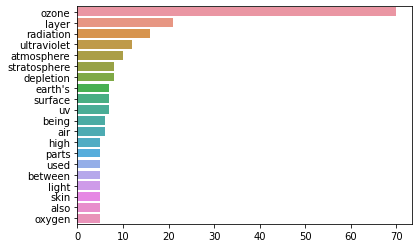

In [49]:
gr_x = [v for k, v in frequency_of.items()]
gr_y = [k for k, v in frequency_of.items()]

st_data_vis.barplot(x = gr_x[0:20], y = gr_y[0:20])

In [50]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v4.1.12-deab022 (production)
Loading parameters:  OK
User tolbayev_m connection: OK


<MY_MR_CLEAN>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT        MY MR CLEAN 

 Status             SUCCESS     
 Execution Runtime  4.212179    
 Score              [====-] 4/5 


Checks detail Report:

 TEST COUNT FREQUENCY  SUCCESS 



 TEST GET CONTENT  SUCCESS 



 TEST LOWER COLLECTION  SUCCESS 



 TEST MERGE CONTENTS  SUCCESS 



     TEST TOKENIZE                                                                   